<a href="https://colab.research.google.com/github/prakharsingh97/notes/blob/main/study_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PCA




Each dimension increase leads to a more complexity in representation of data 
PCA does 
1. Plot the data 
2. Calculates the average 
3. With average one can focus on center of the data
4. For eg for 2 values the avg becomes the x and the y corrdinate and then we plot the point (x,y). This point is the new center.
5. Now we shift so this center is the new origin. Realtive distance remains the same
6. Now we find a line that fits it best and rotate it from center 
7. It tries for larger distance from points or smaller distance from center of orign for the PCA line 
8. Now we draw a line that fits the data best as it can . This line must pass through the orign
            For 2 variables
9. PCA finds the best fit line using the sum of distances after projecting the points on the line and min the sum of those d or max if it is from center/orign as a^2 =  b^2 + c^2  b and c are inversly proportional 
10. This line is called PC1 or principal componenet 1 
11. PC1 will have a slope of n = b/c units and that is the ratio so it takes b parts of B and c parts of C . This is called the linear combination.PC1 is linear combination of data.
12. Now if tan0 = b/c then by using pythogorus theorum we can find a^2 = b^2 + c^2 .Now divide by a so hypo = 1 . b/a = x and c/a = y .            (1 ,c/a , b/a)
13. Now this unit vector that comprises of x units of quantity A and y parts of quantity B . This is called the Eignvector for PC1.
14. And proportion of each are called Loading scores 
15. And PCA calls the sum of distances of PC1 as Eignvalues of PC1
16. And sq_root(pc1) is called the Singular Value 
17. PC2 perpendicular to PC1 
18. Now to find rotate PC1 and PC2 so that they are new axis .
19. Now use projections of points on PC1 and PC2 as x and y to find PCA 
20. Variation = EignValue / samplesize -1 
21. Now sum Var(A) + Var(B) and divide var(A)/sum to find the contribution
21. Scree Plot : Is graphical representation of variation that each PC accounts for 
22. Now if we have 4 dimensions we can reduce it by considering only 2 of these variations the most imp for Dimension Reduction.



       wt1  wt2  wt3  wt4  wt5  ko1  ko2  ko3   ko4  ko5
gene1   37   46   35   39   37  728  707  759   752  741
gene2   57   61   57   72   49  969  996  991  1002  977
gene3  635  654  640  628  679  988  966  939   983  996
gene4  109  112  111  107  111  331  368  389   357  371
gene5  655  636  662  684  649   27   24   23    24   13
(100, 10)


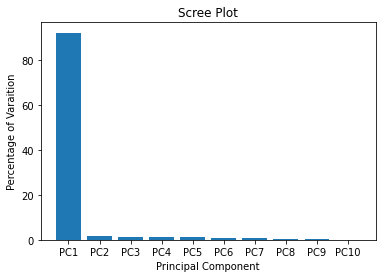

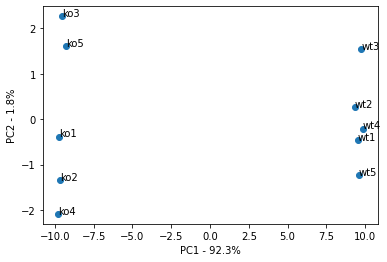

gene33    0.104041
gene2     0.104023
gene5     0.104003
gene21    0.103987
gene68    0.103979
            ...   
gene53    0.079326
gene89    0.079110
gene6     0.062826
gene56    0.059610
gene13    0.039642
Length: 100, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt 

gene = ['gene' + str(i) for i  in range(1,101) ]
wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' +str(i) for i in range(1,6)]

data = pd.DataFrame(columns = [*wt , *ko] , index = gene)

for gene in data.index :
    data.loc[gene , 'wt1':'wt5'] = np.random.poisson(lam = rd.randrange(10 , 1000) , size =5 )
    data.loc[gene , 'ko1':'ko5'] = np.random.poisson(lam = rd.randrange(10 , 1000) , size =5 )

print(data.head())
print(data.shape )

scaled_data = preprocessing.scale(data.T) #Center avg =0 scale s.d =0  #imp tp Transpose
pca = PCA() #sklearn uses an object module 
pca.fit(scaled_data) #PCA math
pca_data = pca.transform(scaled_data) #create the graph
#print(pca_data)

per_var = np.round(pca.explained_variance_ratio_*100 ,decimals = 1 )
labels = ['PC' + str(i) for i in range(1 , len(per_var) +1 )]

plt.bar(x = range(1, len(per_var) +1), height = per_var , tick_label = labels )
plt.xlabel("Principal Component")
plt.ylabel("Percentage of Varaition")
plt.title("Scree Plot")
plt.show()

pca_df = pd.DataFrame(pca_data , index = [*wt , *ko] , columns= labels) #they become the axis 
plt.scatter(pca_df.PC1 , pca_df.PC2)
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
for sample in pca_df.index:
    plt.annotate(sample , (pca_df.PC1.loc[sample] ,pca_df.PC2.loc[sample]))
plt.show()

loading_scores =pd.Series(pca.components_[0] , index = data.index)
sorted_loading_scores = loading_scores.abs().sort_values(ascending = False)
print(sorted_loading_scores)

#LDA

1. LDA is like PCA but it focuses on increaing the seperability of categories whereas PCA focuses on variations 
2. Reduction in a 2D graph to 1D . Worse way (ignore a dimension) where LDA will just plot a 1D graph.
3. Criteria for LDA
    1. Maximize the distance between the means of the projected data 
    2. Minimize the variation called scatter
    3. Formula 

4. Well seperation done than PCA

    





#Decision trees

Decision tress asks a question and answers it with a Yes or No
1. Classification can be categorical(yes or
 no) or numeric (as in >1000 or so)
2. right does not be equal to left
3. Top of tree root node
4. Leaf nodes arrow pointing to them 
5. If all of the options/questions/decision markers do not end up in a 100 per yes or no ans it is called an impure node
6. Impurity measurement is called Gini
8. Gini Probability = 1 - p(yes)^2 - p(no)^2
9. Now take weighted mean ((item in  one leaf node)/ total items)*Gini Impurity of that note . Sum for both nodes.
10. Choose the lowest 
11. Rinse and repeat untill it is done
12. For color choice all options for eg R,G,Y (R,G,Y,RG,GY,YR,RGY)
13. Ranking for eg(1,2,3,4) . Use rank < = 1  , 2, 3, and no 4 as it would include everyone 

##Missing data and Feature selection
1. Feature selection based on impurity reduction
2. We can set a threshold for how much impurity we want to reduce
3. How to check impurity reduction ? Gini index duh ....
4. Prevents Overfitting
5. Decision tress are often overfit 
6. For missing data : use highest correlation or use a most common value in that column
7. For numerical data : regression



In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier #build a classification tree
from sklearn.tree import plot_tree #plotting a classification tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data" , header = None)
df.head()
##change column names 


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
